In [2]:
%cd ../
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from visualizations import *


/home/dudevil/prog/dmlabs/DRD
Populating the interactive namespace from numpy and matplotlib


Using gpu device 0: GeForce GTX 980


### Some early gibberish

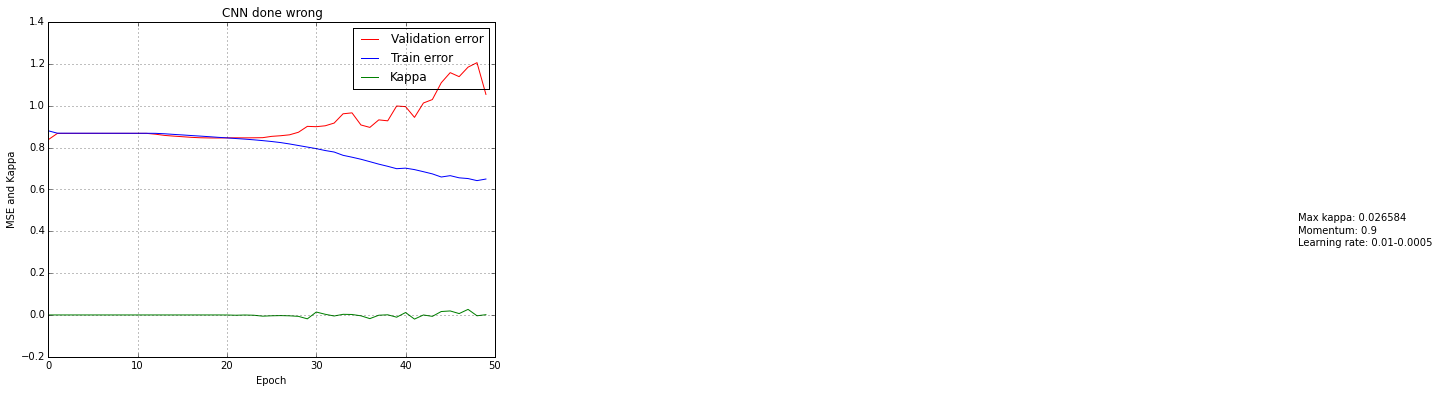

In [2]:
# this is for the lulz =)

result = np.load("./data/tidy/5conv_2dense.npy")
epochs = np.arange(result.shape[1])

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1], 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0], 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE and Kappa")
plt.title("CNN done wrong")
plt.text(140, .45,"Max kappa: %f" % result[2].max())
plt.text(140, .39, "Momentum: 0.9")
plt.text(140, .33, "Learning rate: 0.01-0.0005")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend()
plt.grid()
plt.show()

### Square crops/rotations

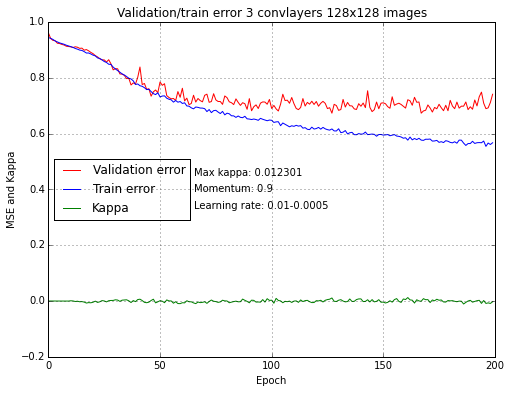

In [3]:
# see: https://trello.com/c/vsfaZrQl/20--
# kappa is broken here :(

result = np.load("./data/tidy/3conv_2dense_reg.npy")
epochs = np.arange(result.shape[1])

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1], 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0], 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(65, .45,"Max kappa: %f" % result[2].max())
plt.text(65, .39, "Momentum: 0.9")
plt.text(65, .33, "Learning rate: 0.01-0.0005")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend(loc="center left")
plt.grid()
plt.show()

### Added Maxout

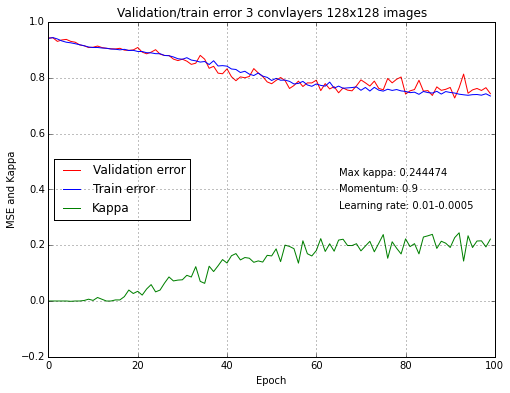

In [4]:
# see: https://trello.com/c/leb29DDl/13-maxout

result = np.load("./data/tidy/3conv_2maxout.npy")
epochs = np.arange(100)

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1], 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0], 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(65, .45,"Max kappa: %f" % result[2].max())
plt.text(65, .39, "Momentum: 0.9")
plt.text(65, .33, "Learning rate: 0.01-0.0005")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend(loc="center left")
plt.grid()
plt.show()

### Tried LCN preprocessing

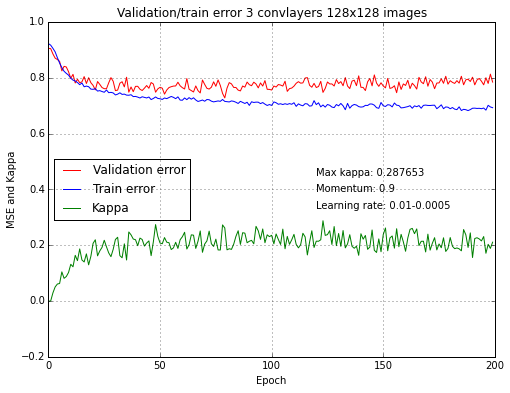

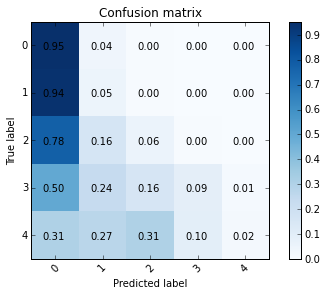

In [5]:
# see: https://trello.com/c/lDpUFE18/21-local-contrast-normalization

result = np.load("./data/tidy/lcn/5conv_1dense.npy")
epochs = np.arange(result.shape[1])

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1], 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0], 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(120, .45,"Max kappa: %f" % result[2].max())
plt.text(120, .39, "Momentum: 0.9")
plt.text(120, .33, "Learning rate: 0.01-0.0005")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend(loc="center left")
plt.grid()
plt.show()
plot_confusion_matrix(np.load("data/tidy/lcn/confusion.npy"))

### Added a convolutional layer and logscale learning rate 

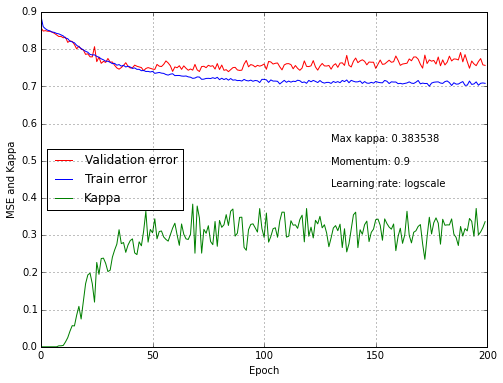

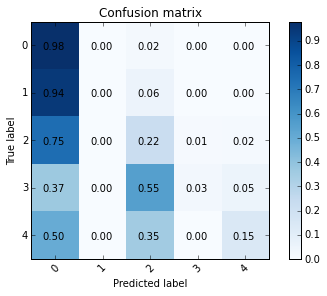

In [6]:
result = np.load("./data/tidy/4conv/5conv_1dense.npy")
epochs = np.arange(result.shape[1])

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1], 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0], 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE and Kappa")
plt.text(130, .55,"Max kappa: %f" % result[2].max())
plt.text(130, .49, "Momentum: 0.9")
plt.text(130, .43, "Learning rate: logscale")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend(loc="center left")
plt.grid()
plt.show()
plot_confusion_matrix(np.load("data/tidy/4conv/confusion.npy"))

### Overlapping pooling

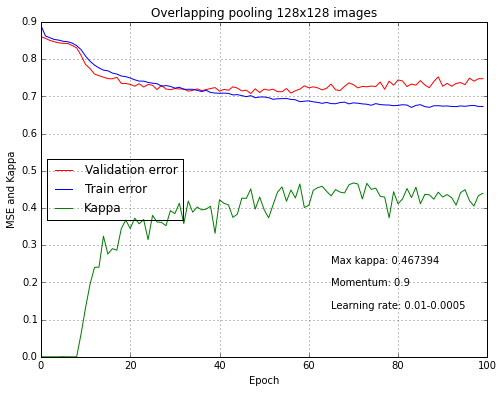

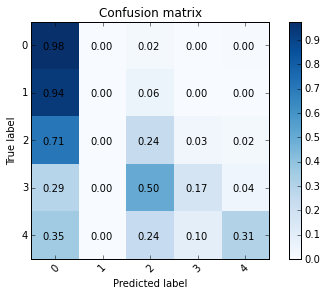

In [7]:
# see: https://trello.com/c/ACJXmkHH/23-overlapping-pooling

result = np.load("./data/tidy/pool_overlap/training.npy")
epochs = np.arange(result.shape[1])

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1], 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0], 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE and Kappa")
plt.title("Overlapping pooling 128x128 images")
plt.text(65, .25,"Max kappa: %f" % result[2].max())
plt.text(65, .19, "Momentum: 0.9")
plt.text(65, .13, "Learning rate: 0.01-0.0005")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend(loc="center left")
plt.grid()
plt.show()
plot_confusion_matrix(np.load("data/tidy/pool_overlap/confusion.npy"))

## Ordinal regression

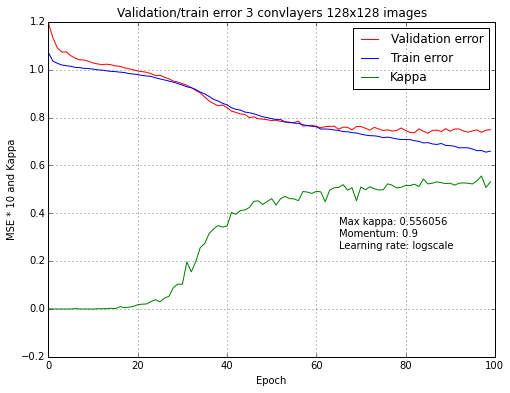

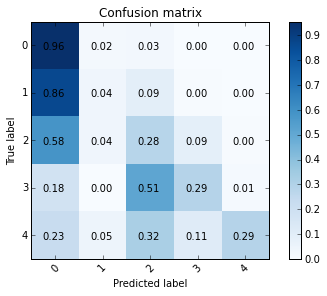

In [8]:
# see: https://trello.com/c/Cr0N6tNH/19-ordinal-regression

result = np.load("data/tidy/ordinal/training.npy")
epochs = np.arange(100)

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(65, .35,"Max kappa: %f" % result[2].max())
plt.text(65, .3, "Momentum: 0.9")
plt.text(65, .25, "Learning rate: logscale")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend()
plt.grid()
plt.show()

plot_confusion_matrix(np.load("data/tidy/ordinal/confusion.npy"))

## ReLUs comparison

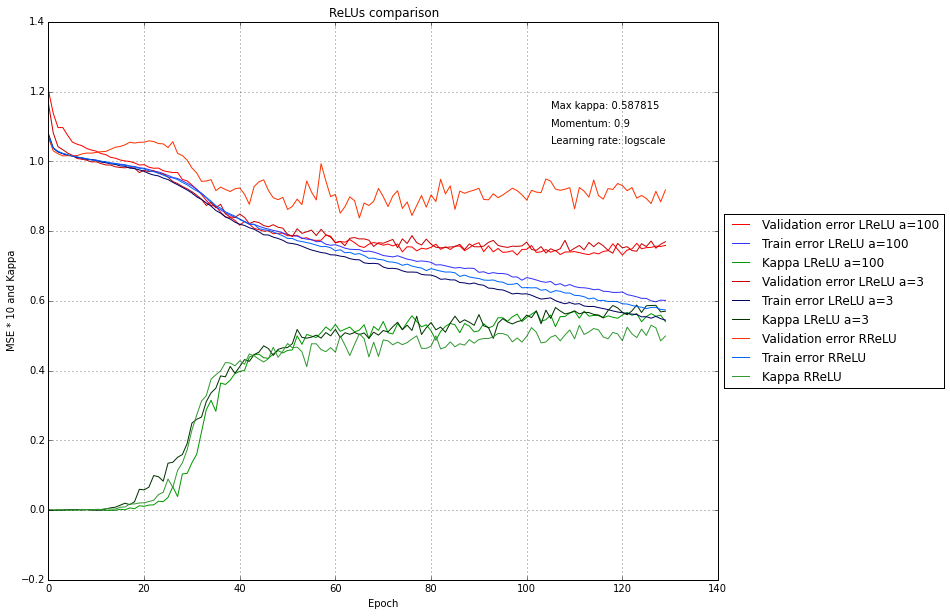

In [4]:
#see: https://trello.com/c/jrXtkex4/17-parametric-relu

leak100 = np.load("./data/tidy/leakrelu100/training.npy")
leak3 = np.load("./data/tidy/leakrelu3/training.npy")
randr = np.load("./data/tidy/randrelu/training.npy")
epochs = np.arange(130)

figure(figsize=(12, 10))
plt.plot(epochs, leak100[1] * 10, '#FF0000', label="Validation error LReLU a=100")
plt.plot(epochs, leak100[0] * 10, '#3333FF', label="Train error LReLU a=100")
plt.plot(epochs, leak100[2], '#009900', label="Kappa LReLU a=100")
plt.plot(epochs, leak3[1] * 10, '#CC0000', label="Validation error LReLU a=3")
plt.plot(epochs, leak3[0] * 10, '#000066', label="Train error LReLU a=3")
plt.plot(epochs, leak3[2], '#003300', label="Kappa LReLU a=3")
plt.plot(epochs, randr[1] * 10, '#FF3300', label="Validation error RReLU")
plt.plot(epochs, randr[0] * 10, '#0066FF', label="Train error RReLU")
plt.plot(epochs, randr[2], '#339933', label="Kappa RReLU")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("ReLUs comparison")
plt.text(105, 1.15,"Max kappa: %f" % max(randr[2].max(), leak3[2].max(), leak100[2].max()))
plt.text(105, 1.1, "Momentum: 0.9")
plt.text(105, 1.05, "Learning rate: logscale")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend(loc='center left',bbox_to_anchor=(1, .5))
plt.grid()
plt.show()

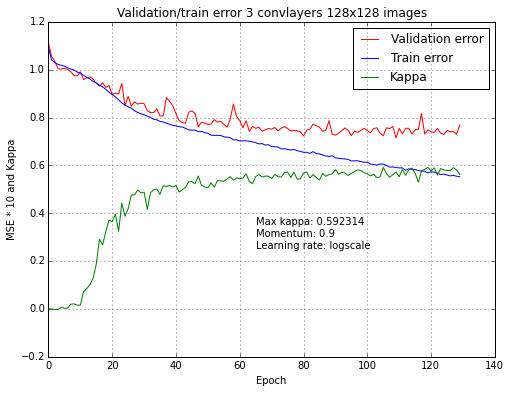

In [2]:
# see: dropout on all three fc levels

result = np.load("data/tidy/dropfixed/training.npy")
epochs = np.arange(result.shape[1])

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(65, .35,"Max kappa: %f" % result[2].max())
plt.text(65, .3, "Momentum: 0.9")
plt.text(65, .25, "Learning rate: logscale")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend()
plt.grid()
plt.show()

In [5]:
result[0, 56] / result[1, 56]

0.94550912144990351

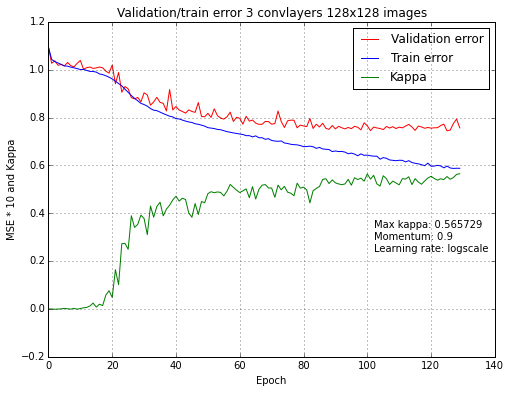

In [16]:
# some experiment on the 14 of may eveneing from the laptop
# see what it is later

result = np.load("data/tidy/laptop14may/training.npy")
epochs = np.arange(result.shape[1])

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(102, .34,"Max kappa: %f" % result[2].max())
plt.text(102, .29, "Momentum: 0.9")
plt.text(102, .24, "Learning rate: logscale")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend()
plt.grid()
plt.show()

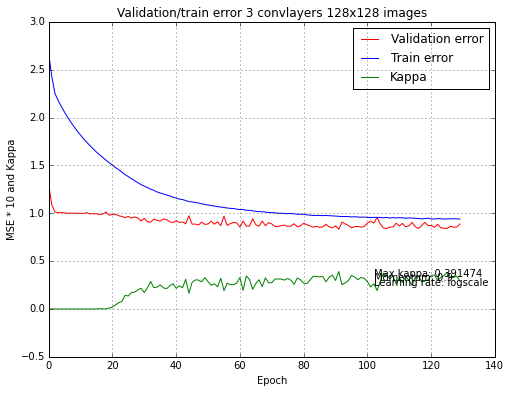

In [3]:
# added random rotations up to 30 degrees

result = np.load("data/tidy/training.npy")
epochs = np.arange(result.shape[1])

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(102, .34,"Max kappa: %f" % result[2].max())
plt.text(102, .29, "Momentum: 0.9")
plt.text(102, .24, "Learning rate: logscale")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend()
plt.grid()
plt.show()

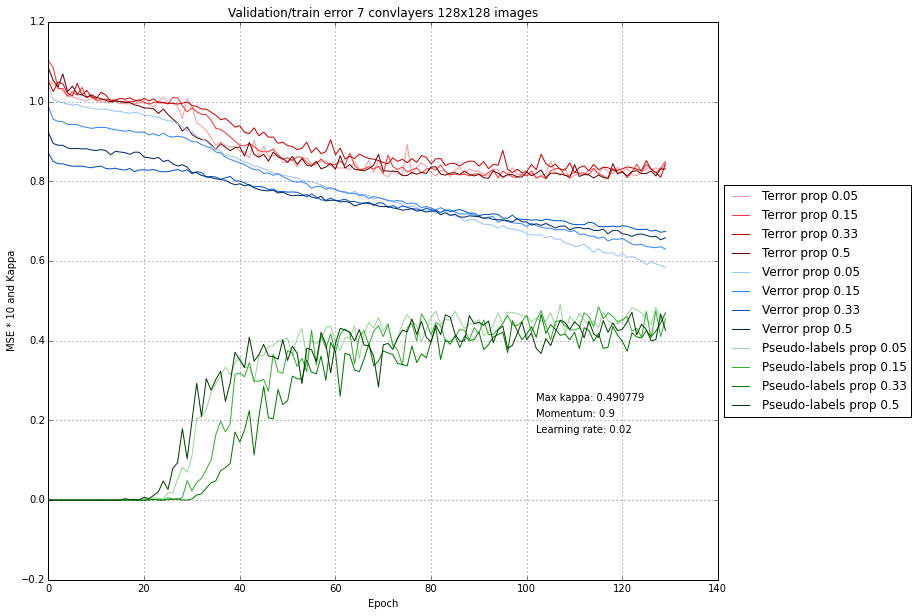

In [18]:
# Pseudo-labeling with different proportions

result005 = np.load("data/tidy/7conv_pl005/training.npy")
result015 = np.load("data/tidy/7conv_pl015/training.npy")
result03 = np.load("data/tidy/7conv_pl03/training.npy")
result05 = np.load("data/tidy/7conv_pl05/training.npy")
epochs = np.arange(result.shape[1])

figure(figsize=(12, 10))
test_err = plt.plot(epochs, result005[1] * 10, '#FF9999', label="Terror prop 0.05")
test_err = plt.plot(epochs, result015[1] * 10, '#FF3333', label="Terror prop 0.15")
test_err = plt.plot(epochs, result03[1] * 10, '#CC0000', label="Terror prop 0.33")
test_err = plt.plot(epochs, result05[1] * 10, '#660000', label="Terror prop 0.5")

train_err =  plt.plot(epochs, result005[0] * 10, '#99C2FF', label="Verror prop 0.05")
train_err =  plt.plot(epochs, result015[0] * 10, '#3385FF', label="Verror prop 0.15")
train_err =  plt.plot(epochs, result03[0] * 10, '#0052CC', label="Verror prop 0.33")
train_err =  plt.plot(epochs, result05[0] * 10, '#002966', label="Verror prop 0.5")

kappa =  plt.plot(epochs, result005[2], '#99D699', label="Kappa prop 0.05")
kappa =  plt.plot(epochs, result015[2], '#33AD33', label="Kappa prop 0.15")
kappa =  plt.plot(epochs, result03[2], '#007A00', label="Kappa prop 0.33")
kappa =  plt.plot(epochs, result05[2], '#003D00', label="Kappa prop 0.5")

plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 7 convlayers 128x128 images")
plt.text(102, .25,"Max kappa: %f" % max(result005[2].max(), result015[2].max(), result03[2].max(), result05[2].max()))
plt.text(102, .21, "Momentum: 0.9")
plt.text(102, .17, "Learning rate: 0.02")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend(loc='center left',bbox_to_anchor=(1, .5))
plt.grid()

plt.show()

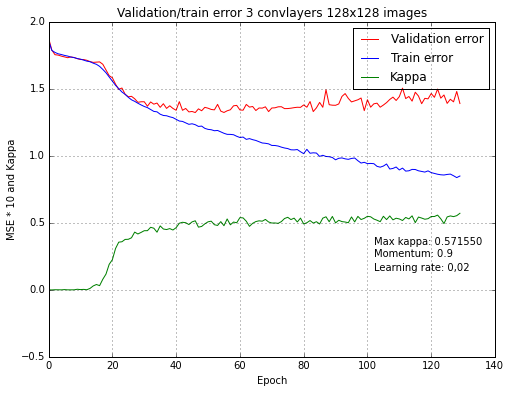

In [13]:
# added random rotations up to 30 degrees

result = np.load("data/tidy/weights1234/training.npy")
epochs = np.arange(result.shape[1])

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(102, .34,"Max kappa: %f" % result[2].max())
plt.text(102, .25, "Momentum: 0.9")
plt.text(102, .14, "Learning rate: 0,02")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend()
plt.grid()
plt.show()

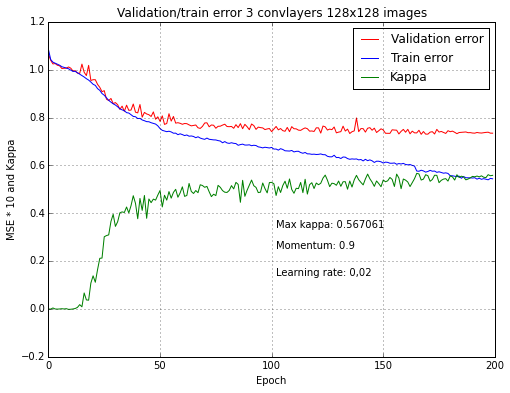

In [2]:
# added random rotations up to 30 degrees

result = np.load("data/tidy/training.npy")
epochs = np.arange(result.shape[1])

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(102, .34,"Max kappa: %f" % result[2].max())
plt.text(102, .25, "Momentum: 0.9")
plt.text(102, .14, "Learning rate: 0,02")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend()
plt.grid()
plt.show()

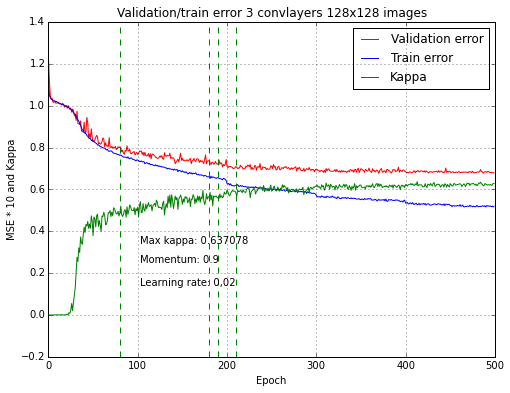

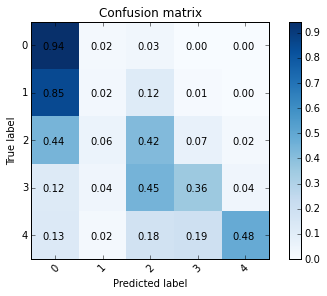

In [19]:
# added random rotations up to 30 degrees

result = np.load("data/tidy/training.npy")
epochs = np.arange(result.shape[1])

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(102, .34,"Max kappa: %f" % result[2].max())
plt.text(102, .25, "Momentum: 0.9")
plt.text(102, .14, "Learning rate: 0,02")
plt.axvline(80, linestyle='--', color='g')
plt.axvline(180, linestyle='--', color='g')
plt.axvline(190, linestyle='--', color='g')
plt.axvline(210, linestyle='--', color='g')
plt.legend()
plt.grid()
plt.show()
plot_confusion_matrix(np.load("data/tidy/dropoutalllayers/confusion.npy"))

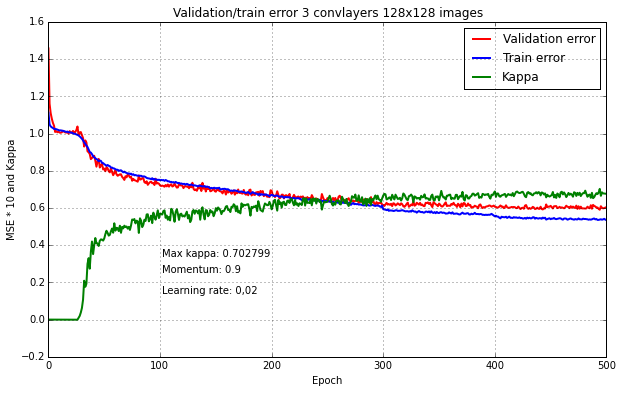

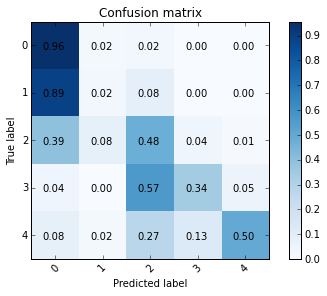

In [8]:
# added random rotations up to 30 degrees

result = np.load("data/tidy/shift_10_2/training.npy")
epochs = np.arange(result.shape[1])

figure(figsize=(10,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', linewidth=2.,label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', linewidth=2., label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', linewidth=2.,label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(102, .34,"Max kappa: %f" % result[2].max())
plt.text(102, .25, "Momentum: 0.9")
plt.text(102, .14, "Learning rate: 0,02")
plt.legend()
plt.grid()
plt.show()
plot_confusion_matrix(np.load("data/tidy/shift_10_2//confusion.npy"))

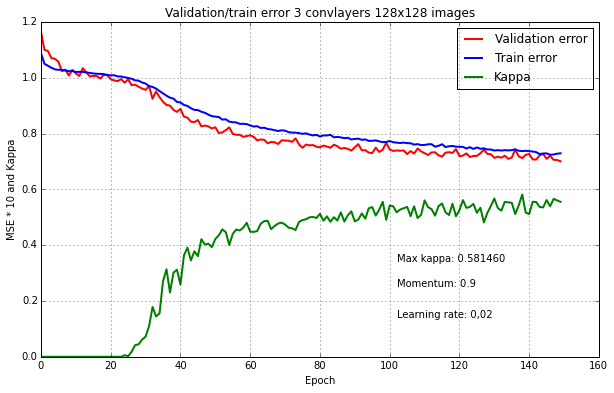

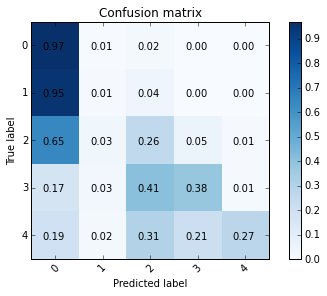

In [30]:
result = np.load("data/tidy/training_150.npy")
epochs = np.arange(result.shape[1])

figure(figsize=(10,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', linewidth=2.,label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', linewidth=2., label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', linewidth=2.,label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(102, .34,"Max kappa: %f" % result[2].max())
plt.text(102, .25, "Momentum: 0.9")
plt.text(102, .14, "Learning rate: 0,02")
plt.legend()
plt.grid()
plt.show()
plot_confusion_matrix(np.load("data/tidy/confusion_150.npy"))

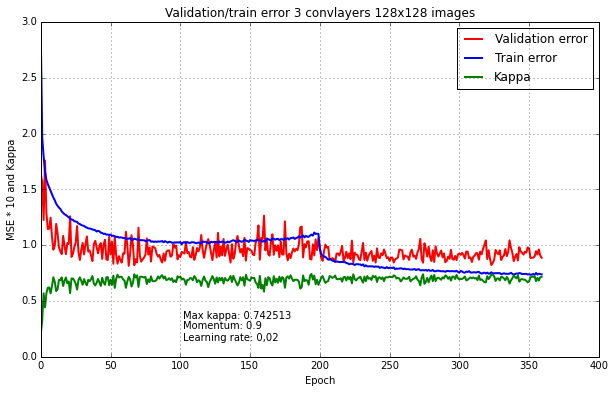

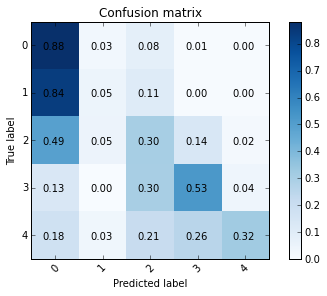

In [22]:
result = np.load("data/tidy/256g_balanced/training_360.npy")
epochs = np.arange(result.shape[1])

figure(figsize=(10,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', linewidth=2.,label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', linewidth=2., label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', linewidth=2.,label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(102, .34,"Max kappa: %f" % result[2].max())
plt.text(102, .25, "Momentum: 0.9")
plt.text(102, .14, "Learning rate: 0,02")
plt.legend()
plt.grid()
plt.show()
plot_confusion_matrix(np.load("data/tidy/256g_balanced/confusion_360.npy"))

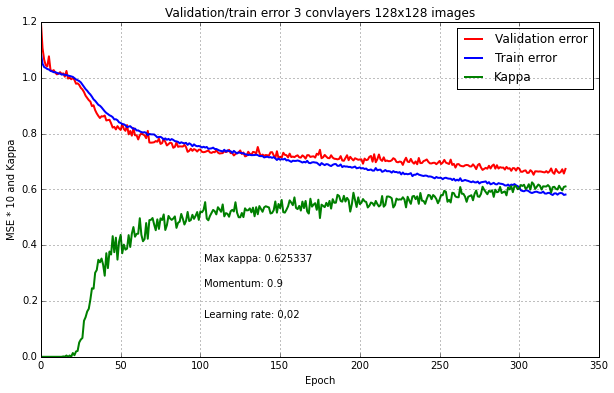

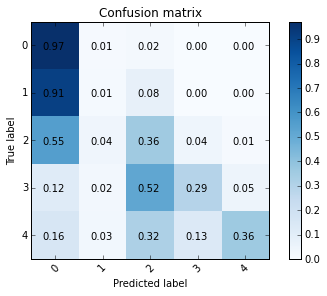

In [3]:
result = np.load("data/tidy/training_330.npy")
epochs = np.arange(result.shape[1])

figure(figsize=(10,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', linewidth=2.,label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', linewidth=2., label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', linewidth=2.,label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(102, .34,"Max kappa: %f" % result[2].max())
plt.text(102, .25, "Momentum: 0.9")
plt.text(102, .14, "Learning rate: 0,02")
plt.legend()
plt.grid()
plt.show()
plot_confusion_matrix(np.load("data/tidy/confusion_330.npy"))

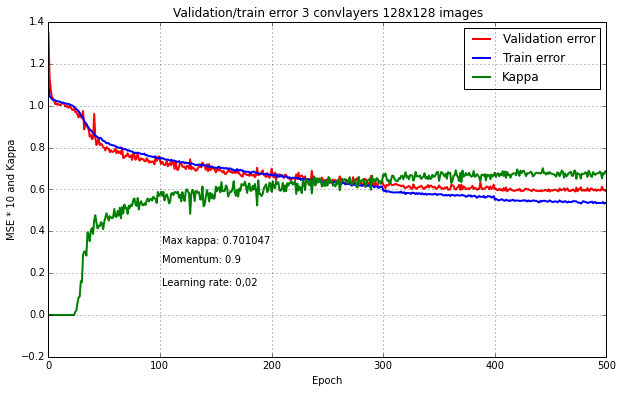

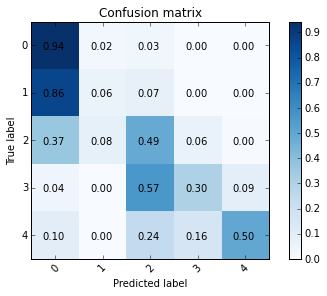

In [10]:

result = np.load("data/tidy/shift10/training.npy")
epochs = np.arange(result.shape[1])
figure(figsize=(10,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', linewidth=2.,label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', linewidth=2., label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', linewidth=2.,label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(102, .34,"Max kappa: %f" % result[2].max())
plt.text(102, .25, "Momentum: 0.9")
plt.text(102, .14, "Learning rate: 0,02")
plt.legend()
plt.grid()
plt.show()
plot_confusion_matrix(np.load("data/tidy/shift10/confusion.npy"))

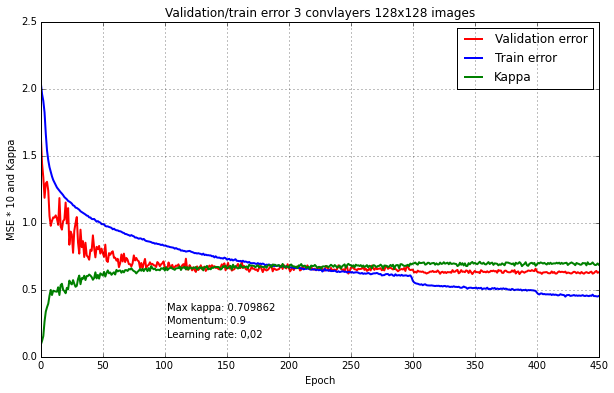

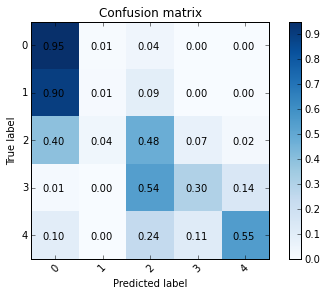

In [12]:
result = np.load("data/tidy/balanced_classes/training.npy")
epochs = np.arange(result.shape[1])
figure(figsize=(10,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', linewidth=2.,label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', linewidth=2., label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', linewidth=2.,label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(102, .34,"Max kappa: %f" % result[2].max())
plt.text(102, .25, "Momentum: 0.9")
plt.text(102, .14, "Learning rate: 0,02")
plt.legend()
plt.grid()
plt.show()
plot_confusion_matrix(np.load("data/tidy/balanced_classes/confusion.npy"))

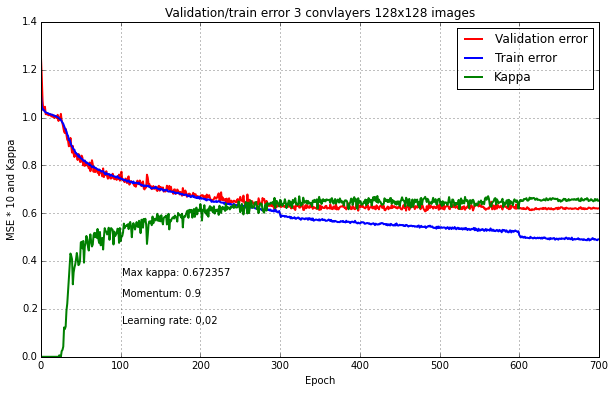

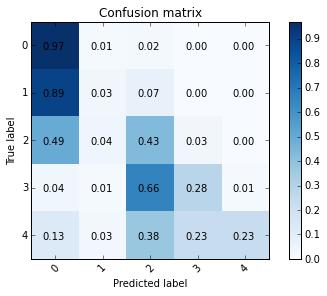

In [15]:

result = np.load("data/tidy/training.npy")
epochs = np.arange(result.shape[1])
figure(figsize=(10,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', linewidth=2.,label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', linewidth=2., label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', linewidth=2.,label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(102, .34,"Max kappa: %f" % result[2].max())
plt.text(102, .25, "Momentum: 0.9")
plt.text(102, .14, "Learning rate: 0,02")
plt.legend()
plt.grid()
plt.show()
plot_confusion_matrix(np.load("data/tidy/confusion.npy"))

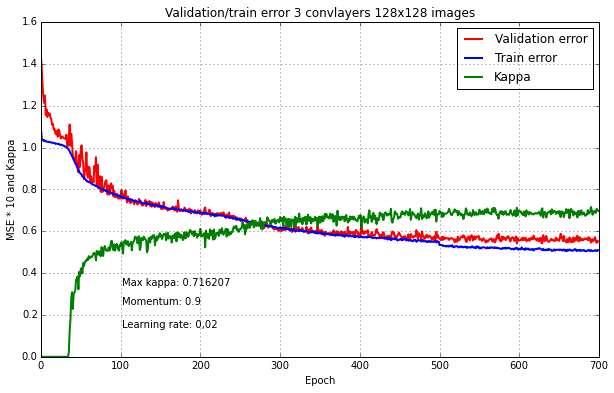

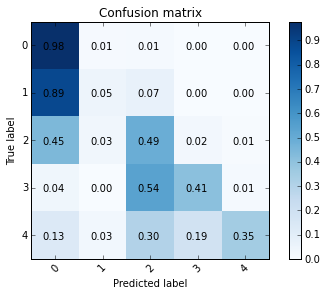

In [10]:
result = np.load("data/tidy/training.npy")
epochs = np.arange(result.shape[1])
figure(figsize=(10,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', linewidth=2.,label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', linewidth=2., label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', linewidth=2.,label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(102, .34,"Max kappa: %f" % result[2].max())
plt.text(102, .25, "Momentum: 0.9")
plt.text(102, .14, "Learning rate: 0,02")
plt.legend()
plt.grid()
plt.show()
plot_confusion_matrix(np.load("data/tidy/confusion.npy"))


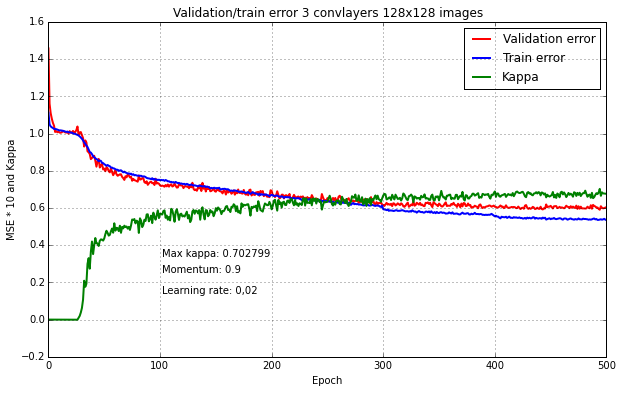

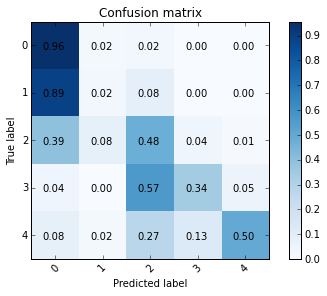

In [20]:
result = np.load("data/tidy/shift_10_2//training.npy")
epochs = np.arange(result.shape[1])
figure(figsize=(10,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', linewidth=2.,label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', linewidth=2., label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', linewidth=2.,label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(102, .34,"Max kappa: %f" % result[2].max())
plt.text(102, .25, "Momentum: 0.9")
plt.text(102, .14, "Learning rate: 0,02")
plt.legend()
plt.grid()
plt.show()
plot_confusion_matrix(np.load("data/tidy/shift_10_2//confusion.npy"))


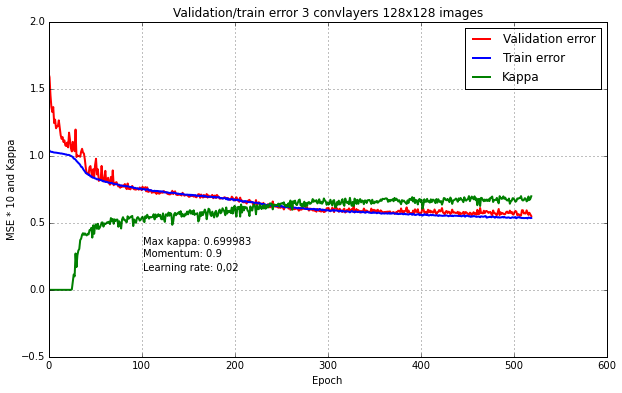

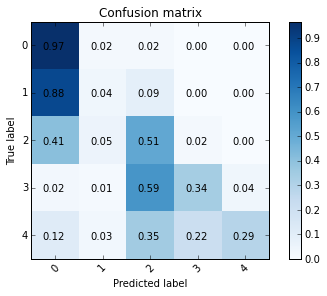

In [28]:
result = np.load("data/tidy/training_520.npy")
epochs = np.arange(result.shape[1])
figure(figsize=(10,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', linewidth=2.,label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', linewidth=2., label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', linewidth=2.,label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(102, .34,"Max kappa: %f" % result[2].max())
plt.text(102, .25, "Momentum: 0.9")
plt.text(102, .14, "Learning rate: 0,02")
plt.legend()
plt.grid()
plt.show()
plot_confusion_matrix(np.load("data/tidy/confusion_520.npy"))
